<a href="https://colab.research.google.com/github/clayclay2004-png/NFLDataTest/blob/main/NFL_Data_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nfl_data_py
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install sklearn
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 127.4 MB/s eta 0:00:00
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-linux_x86_64.whl size=41460865 sha256=d2ffb5d0e4ae05fbd8e53a53cf24e9b7e9b3c95bc080a6a4ff66dc674a99bb11
  Stored in directory: /root/.cache/pip/wheels/fb/83/18/8e7307aa1185c5498c5490e4d9c8a1732d9f1056e86c3491c6
Successfully built pandas
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
^C


In [ ]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from xgboost import XGBClassifier

In [ ]:
pbp = nfl.import_pbp_data([2023,2024,2025])

2023 done.
2024 done.
2025 done.
Downcasting floats.


In [ ]:
pbp.head()

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,route,defense_man_zone_type,defense_coverage_type,offense_names,defense_names,offense_positions,defense_positions,offense_numbers,defense_numbers,old_game_id
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,,,None,Christian Holmes;Jartavius Martin;Casey Toohil...,Antonio Hamilton;Andre Chachere;Kris Boyd;Chri...,CB;CB;DE;DE;FS;MLB;MLB;OLB;RB;RB;TE,CB;CB;CB;CB;ILB;ILB;K;OLB;OLB;SS;WR,34;20;95;50;39;51;47;52;24;23;87,33;36;29;35;47;51;5;52;43;22;0,NaN
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,,,None,Nick Gates;Andrew Wylie;Sam Howell;Brian Robin...,Marco Wilson;Kei'Trel Clark;L.J. Collier;Jonat...,C;G;QB;RB;T;T;T;TE;TE;WR;WR,CB;CB;DE;DE;DT;FS;ILB;ILB;OLB;OLB;SS,63;71;14;8;72;77;76;82;87;17;1,20;13;91;93;95;34;7;10;25;52;3,NaN
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,HITCH/CURL,ZONE_COVERAGE,COVER_3,Nick Gates;Andrew Wylie;Sam Howell;Brian Robin...,Marco Wilson;Kei'Trel Clark;L.J. Collier;Jonat...,C;G;QB;RB;T;T;T;TE;WR;WR;WR,CB;CB;DE;DE;FS;ILB;ILB;OLB;OLB;SS;SS,63;71;14;8;72;77;76;82;4;17;1,20;13;91;93;34;7;10;25;97;3;22,NaN
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,,,None,Nick Gates;Andrew Wylie;Sam Howell;Chris Rodri...,Marco Wilson;Kei'Trel Clark;L.J. Collier;Jonat...,C;G;QB;RB;T;T;T;TE;WR;WR;WR,CB;CB;DE;DE;FS;ILB;ILB;OLB;OLB;SS;SS,63;71;14;23;72;77;76;82;4;17;1,20;13;91;93;34;7;10;25;97;3;22,NaN


In [ ]:
print(pbp.shape)
pbp_clean = pbp[(pbp['pass'] == 1) & (pbp['play_type'] != 'no_play')]
print(pbp_clean.shape)

(107258, 398)
(46467, 398)


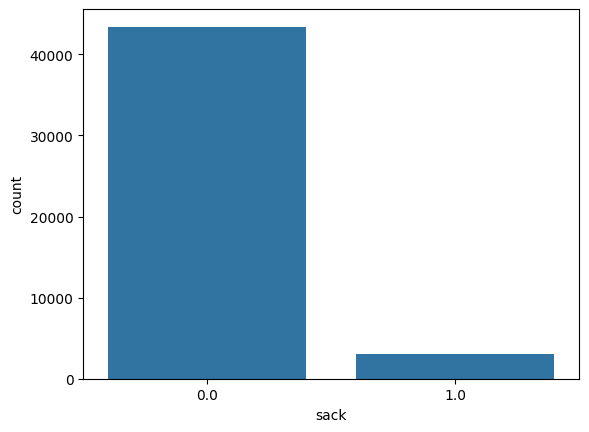

In [ ]:
sns.countplot(x = pbp_clean['sack'])
plt.show()

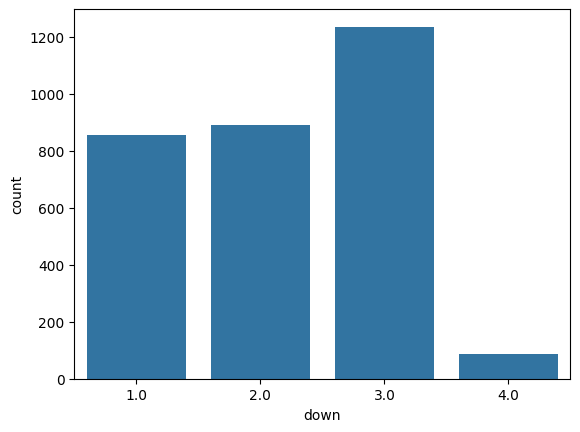

In [ ]:
sacks = pbp_clean[pbp_clean['sack'] == 1]
sns.countplot(x = sacks['down'])
plt.show()

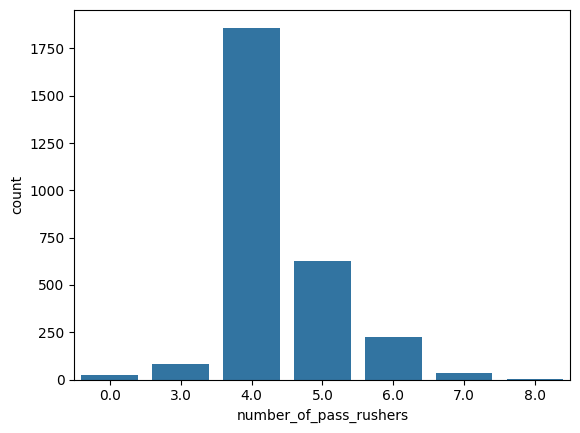

In [ ]:
sns.countplot(x = sacks['number_of_pass_rushers'])
plt.show()

In [ ]:
pbp_clean['obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1, 0)

/tmp/ipython-input-834358539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_clean['obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1, 0)


In [ ]:
pre_df = pbp_clean[['game_id', 'play_id', 'season', 'name', 'down', 'ydstogo',
                    'yardline_100', 'game_seconds_remaining', 'defenders_in_box',
                    'number_of_pass_rushers', 'xpass', 'obvious_pass', 'sack']]
df = pre_df.dropna()
df.isna().sum()

,0
game_id,0
play_id,0
season,0
name,0
down,0
ydstogo,0
yardline_100,0
game_seconds_remaining,0
defenders_in_box,0
number_of_pass_rushers,0


In [ ]:
df.head()

,game_id,play_id,season,name,down,ydstogo,yardline_100,game_seconds_remaining,defenders_in_box,number_of_pass_rushers,xpass,obvious_pass,sack
3,2023_01_ARI_WAS,77.0,2023,S.Howell,2.0,7.0,72.0,3570.0,5.0,4.0,0.661106,0,0.0
5,2023_01_ARI_WAS,124.0,2023,S.Howell,1.0,10.0,64.0,3496.0,5.0,4.0,0.495536,0,0.0
6,2023_01_ARI_WAS,147.0,2023,S.Howell,2.0,10.0,64.0,3492.0,6.0,5.0,0.563005,0,0.0
7,2023_01_ARI_WAS,172.0,2023,S.Howell,1.0,10.0,52.0,3454.0,5.0,5.0,0.484261,0,0.0
8,2023_01_ARI_WAS,197.0,2023,S.Howell,2.0,9.0,51.0,3416.0,6.0,4.0,0.709240,0,0.0


In [ ]:
df['down'] = df['down'].astype('category')
df_no_ids = df.drop(columns = ['game_id', 'play_id', 'name', 'season'])
df_no_ids = pd.get_dummies(df_no_ids, columns = ['down'])


/tmp/ipython-input-1876272331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['down'] = df['down'].astype('category')


In [ ]:
df_no_ids.columns

Index(['ydstogo', 'yardline_100', 'game_seconds_remaining', 'defenders_in_box',
       'number_of_pass_rushers', 'xpass', 'obvious_pass', 'sack', 'down_1.0',
       'down_2.0', 'down_3.0', 'down_4.0'],
      dtype='object')

In [ ]:
df_no_ids.head()

,ydstogo,yardline_100,game_seconds_remaining,defenders_in_box,number_of_pass_rushers,xpass,obvious_pass,sack,down_1.0,down_2.0,down_3.0,down_4.0
3,7.0,72.0,3570.0,5.0,4.0,0.661106,0,0.0,0,1,0,0
5,10.0,64.0,3496.0,5.0,4.0,0.495536,0,0.0,1,0,0,0
6,10.0,64.0,3492.0,6.0,5.0,0.563005,0,0.0,0,1,0,0
7,10.0,52.0,3454.0,5.0,5.0,0.484261,0,0.0,1,0,0,0
8,9.0,51.0,3416.0,6.0,4.0,0.709240,0,0.0,0,1,0,0


In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = 42)
for train_index, test_index in sss.split(df_no_ids, df_no_ids['sack']):
    strat_train_set = df_no_ids.iloc[train_index]
    strat_test_set = df_no_ids.iloc[test_index]

x_train = strat_train_set.drop(columns = ['sack'])
y_train = strat_train_set['sack']
x_test = strat_test_set.drop(columns = ['sack'])
y_test = strat_test_set['sack']

In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LR_pred = pd.DataFrame(LR.predict_proba(x_test), columns = ['no_sack', 'sack'])[['sack']]

print('Brier Score:  ', brier_score_loss(y_test, LR_pred))

Brier Score:   0.061824193608887704


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RF_pred = pd.DataFrame(RF.predict_proba(x_test), columns = ['no_sack', 'sack'])[['sack']]
print('Brier Score:  ', brier_score_loss(y_test, RF_pred))

Brier Score:   0.06611613428740686


In [ ]:
XGB = XGBClassifier(objective='binary:logistic', random_state = 42)
XGB.fit(x_train, y_train)

XGB_pred = pd.DataFrame(XGB.predict_proba(x_test), columns = ['no_sack', 'sack'])[['sack']]
print('Brier Score:  ', brier_score_loss(y_test, XGB_pred))

Brier Score:   0.06355791352526459


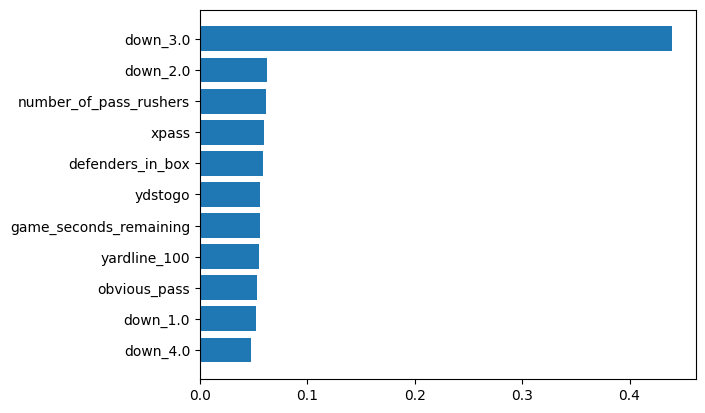

In [ ]:
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.show()

In [ ]:
make_sacks_preds = df_no_ids.drop('sack', axis = 1)
XGB_total_predictions = pd.DataFrame(XGB.predict_proba(make_sacks_preds), columns = ['no_sack', 'sack_pred'])[['sack_pred']]
sacks_preds = df.reset_index().drop(columns = ['index'])
sacks_preds['sack_pred'] = XGB_total_predictions

sacks_preds['sacks_oe'] = sacks_preds['sack'] - sacks_preds['sack_pred']
sacks_preds[(sacks_preds['season'] == 2023)].groupby('name').agg({'sack': 'sum', 'sack_pred':'sum', 'sacks_oe': 'sum'}).reset_index().sort_values('sacks_oe', ascending = True)

,name,sack,sack_pred,sacks_oe
45,J.Allen,26.0,44.958527,-18.958525
92,P.Mahomes,31.0,49.223152,-18.223154
63,J.Love,30.0,43.142193,-13.142195
55,J.Goff,37.0,47.932560,-10.932558
111,T.Tagovailoa,31.0,40.204964,-9.204964
...,...,...,...,...
30,D.Jones,30.0,15.885936,14.114064
115,Z.Wilson,46.0,29.952002,16.047998
11,B.Young,62.0,45.938480,16.061520
98,S.Howell,65.0,47.816345,17.183657


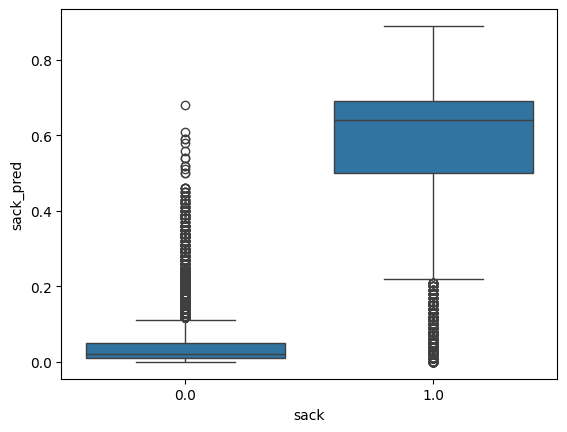

In [ ]:
sns.boxplot(x = sacks_preds['sack'], y = sacks_preds['sack_pred'])
plt.show()

In [ ]:
# Create a dictionary with the columns from x_train and set default values
new_play_data = {col: [0] for col in x_train.columns}

# Update the dictionary with the specific values for the new play
new_play_data['down_3.0'] = [1] # Assuming 'down' 3 corresponds to 'down_3.0' after one-hot encoding
new_play_data['yardline_100'] = [100 - 25] # Convert yardline from yards from goal line to yards from own goal line

# Create the new_play DataFrame with the correct columns and order
new_play = pd.DataFrame(new_play_data)

# Make predictions
LR.predict_proba(new_play)

array([[0.61486251, 0.38513749]])